In [1]:
import pso
import particle
import os
from utils import load_cloud_dataset, load_breast_cancer, load_seg_data, load_digits_dataset, load_satelite_dataset, load_synthetic_dataset
import importlib
import numpy as np
import utils


In [60]:
importlib.reload(particle)
importlib.reload(pso)
importlib.reload(utils)

<module 'utils' from '/home/skholkin/projects/PSO_GMM/utils.py'>

In [2]:
config = pso.PSOConfig.from_json(os.path.join('configs', 'default_params.json'))

data = load_seg_data()
synth_dataset_name = 'Synthetic_dim_70_n_samples_1000_n_comp_15_c_separation_2.0.data.npy'
data = load_synthetic_dataset(synth_dataset_name)
n_runs = 5
eig_coef_list = [0.03, 0.1, 0.3, 1, 3]
eig_coef_list = [0.03]

for coef in eig_coef_list:
    config.eigvals_coef = coef

    res = []
    for i in range(n_runs):

        pso_algo = pso.PSOEigen(data, config)
        res.append(pso_algo.run())
        print(res[-1])

    for key in res[0].keys():
        value = np.mean([item[key] for item in res])

        std = np.std([item[key] for item in res])
        print('Eig Coef', coef)
        print(key, ': ', value, ' +- ', std)

KeyboardInterrupt: 

In [60]:
res_dict

{'em': 74.24607799008619,
 'pso': 74.48534941906306,
 'ref_em_score': 74.16039295495584}

[]

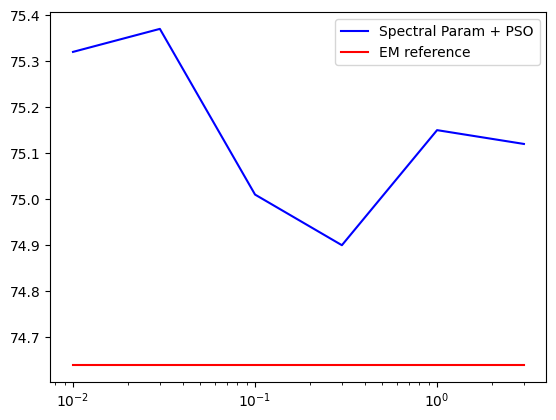

In [1]:
import matplotlib.pyplot as plt

res = [75.32, 75.37, 75.01, 74.9, 75.15, 75.12]
sigmas = [1e-02, 3e-02, 1e-1, 3e-1, 1, 3]

plt.plot(sigmas, res, c='blue', label='Spectral Param + PSO')
plt.plot(sigmas, [74.64 for i in range(len(res))], c='red', label='EM reference')
plt.legend()
plt.xscale('log')
plt.plot()


In [1]:
import pso_v2.pso
import pso_v2.particle
import os
from utils import load_cloud_dataset, load_breast_cancer, load_seg_data, load_digits_dataset, load_satelite_dataset, load_synthetic_dataset
import importlib
import numpy as np

In [18]:

importlib.reload(pso_v2.particle)
importlib.reload(pso_v2.pso)

# importlib.reload(utils)

<module 'pso_v2.pso' from '/home/skholkin/projects/PSO_GMM/pso_v2/pso.py'>

In [21]:
config = pso_v2.pso.PSOConfig.from_json(os.path.join('configs', 'default_params_psov2.json'))

data = load_breast_cancer()
# synth_dataset_name = 'Synthetic_dim_70_n_samples_1000_n_comp_15_c_separation_2.0.data.npy'
# data = load_synthetic_dataset(synth_dataset_name)
coef = 0.01
config.eigvals_coef = coef
res = []
n_runs = 1

for i in range(n_runs):
    pso_algo = pso_v2.pso.PSOEigen(data, config)

    res.append(pso_algo.run()['pso'])

np.array(res).mean(), np.array(res).std()

300 8
Time for GMM init:  8.888431787490845  sec
Particle 0 New LL 74.424918592502
Particle 1 New LL 74.60657625476009
Particle 2 New LL 74.40454785293622
Particle 3 New LL 74.29077137578089
Particle 4 New LL 74.64767306512215
Particle 5 New LL 74.552579149708
Particle 6 New LL 74.3289130588033
Particle 7 New LL 74.38014276840272
Particle 8 New LL 74.39750802493376
Particle 9 New LL 74.43492198126522
Particle 10 New LL 74.3980757266391
Particle 11 New LL 74.3449834000925
Particle 12 New LL 74.38150486322726
Particle 13 New LL 74.46494137854965
Particle 14 New LL 74.50738363302185
Particle 15 New LL 74.51589375746714
Particle 16 New LL 74.38772828168305
Particle 17 New LL 74.48330486186622
Particle 18 New LL 74.1629540874435
Particle 19 New LL 74.39278470118447
Particle 20 New LL 74.44018108284828
Particle 21 New LL 74.44961715567887
Particle 22 New LL 74.45657054054308
Particle 23 New LL 74.647003496973
Particle 24 New LL 74.3918532831749
Particle 25 New LL 74.42157229199405
Particle 2

(75.55733780343661, 0.0)

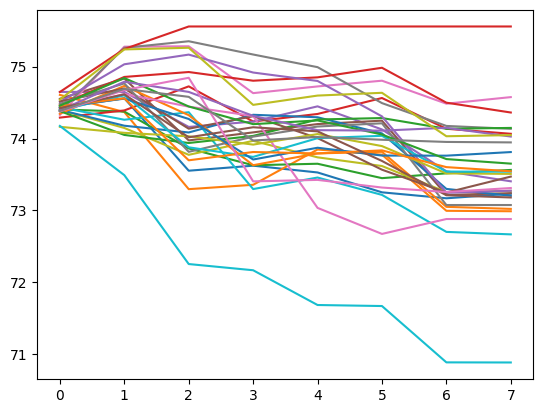

In [23]:
trajectories = pso_algo.particle_trajectories
n_particles = trajectories.shape[0]
import matplotlib.pyplot as plt

for j in range(n_particles):
    plt.plot(np.arange(trajectories.shape[1]), trajectories[j])